目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可是畫圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

作業: 取得另一個 dataset: titanic,

(1) 做條形圖

(2) 利用 facet grid 繪圖並分析

(3) 繪製小提琴圖

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


D:\Hsintien_tsai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


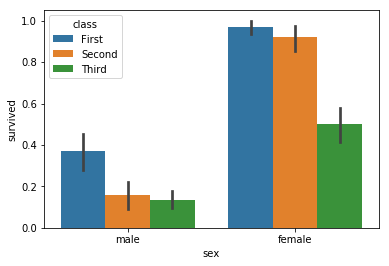

In [6]:
sns.barplot(x = "sex", y = "survived", hue = "class", data = df)
plt.show()

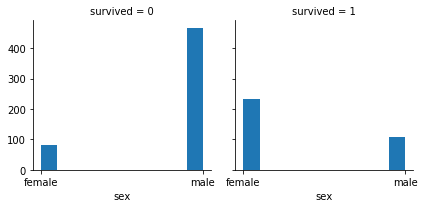

In [9]:
g = sns.FacetGrid(df, col = "survived")
g.map(plt.hist,"sex")
plt.show()

In [10]:
df.groupby('pclass').survived.sum()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

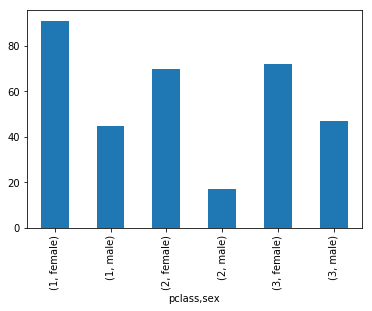

In [12]:
survived=df.groupby(['pclass','sex']).survived.sum()
survived.plot(kind='bar')

In [14]:
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts 

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

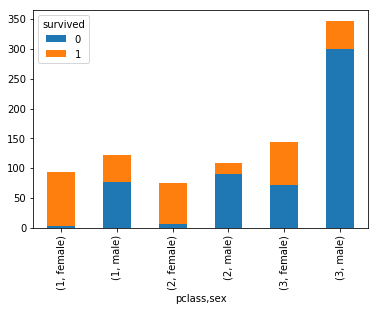

In [15]:
survived_counts.plot(kind='bar', stacked=True)

D:\Hsintien_tsai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


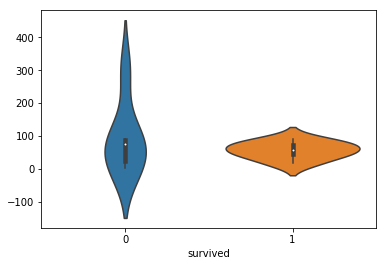

In [17]:
sns.violinplot(data=survived_counts)
plt.show()

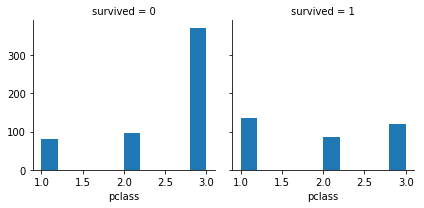

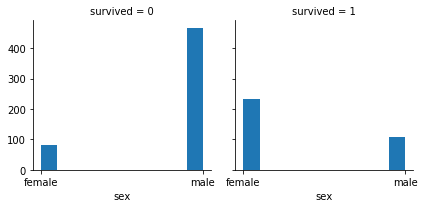

In [23]:
g = sns.FacetGrid(df, col = "survived")
g.map(plt.hist,"pclass")
plt.show()
h = sns.FacetGrid(df, col = "survived")
h.map(plt.hist,"sex")
plt.show()